In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("drug200.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [5]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [6]:
# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)

,Sex,BP,Cholesterol,Drug
0,0,0,0,4
1,1,1,0,2
2,1,1,0,2
3,0,2,0,3
4,0,1,0,4
5,0,2,0,3
6,0,2,0,4
7,1,1,0,2
8,1,2,0,4
9,1,1,1,4


In [7]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

# Analyzing the data

In [8]:
test.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
189,64,1,0,1,20.932,4
168,51,0,1,1,23.003,4
21,63,1,2,0,25.917,4
39,15,1,2,0,9.084,3
108,72,1,0,1,9.677,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 96 to 129
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          160 non-null    int64  
 1   Sex          160 non-null    int64  
 2   BP           160 non-null    int64  
 3   Cholesterol  160 non-null    int64  
 4   Na_to_K      160 non-null    float64
 5   Drug         160 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 8.8 KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 189 to 29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          40 non-null     int64  
 1   Sex          40 non-null     int64  
 2   BP           40 non-null     int64  
 3   Cholesterol  40 non-null     int64  
 4   Na_to_K      40 non-null     float64
 5   Drug         40 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 2.2 KB


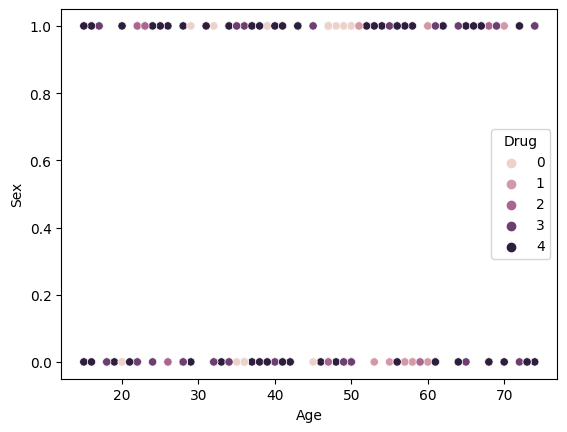

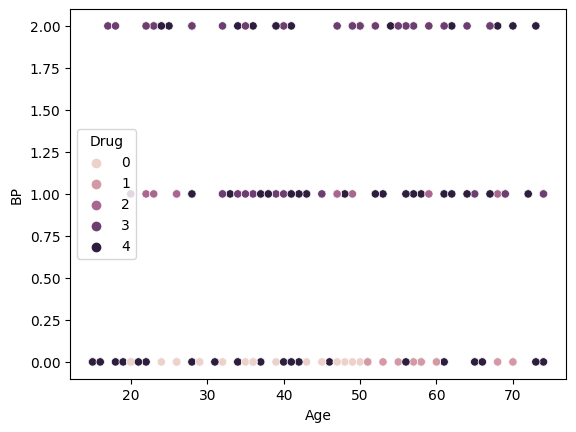

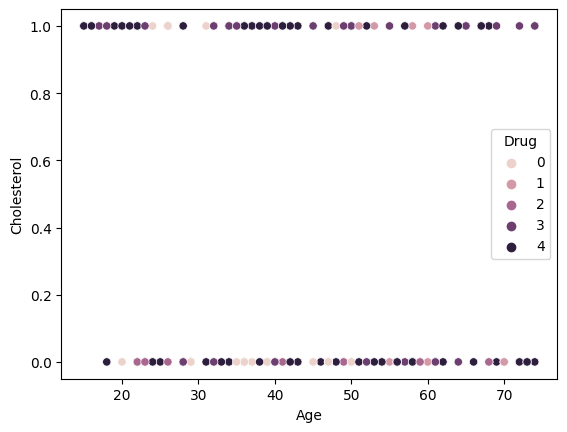

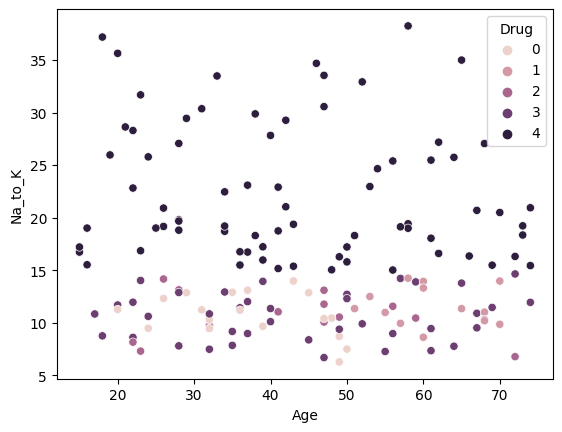

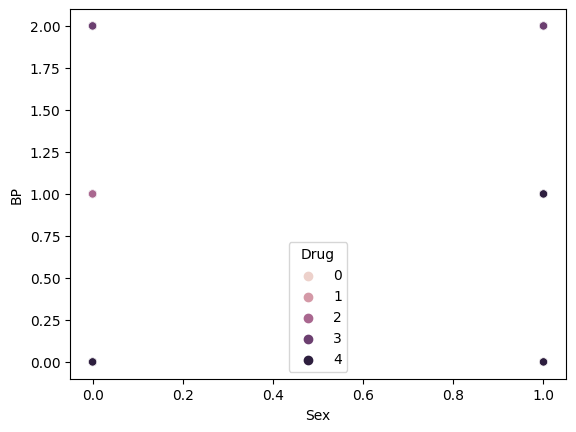

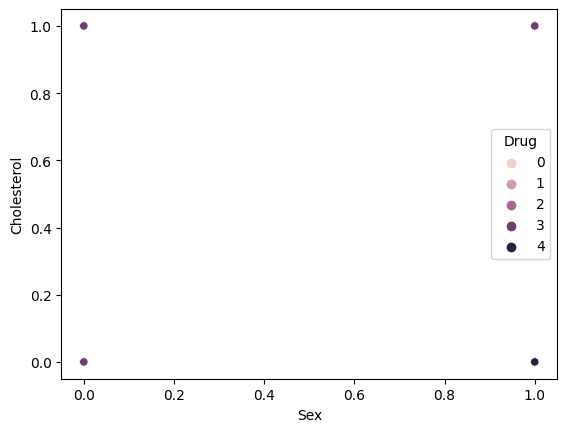

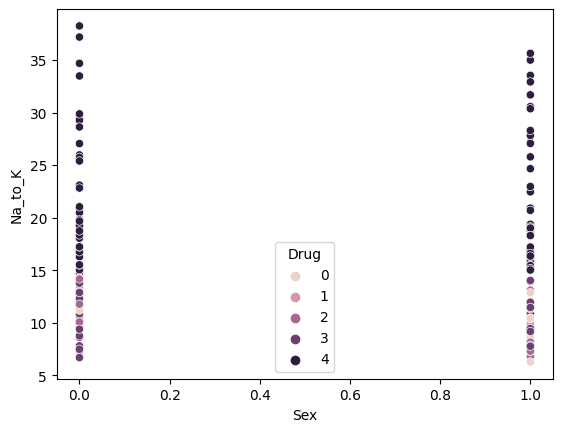

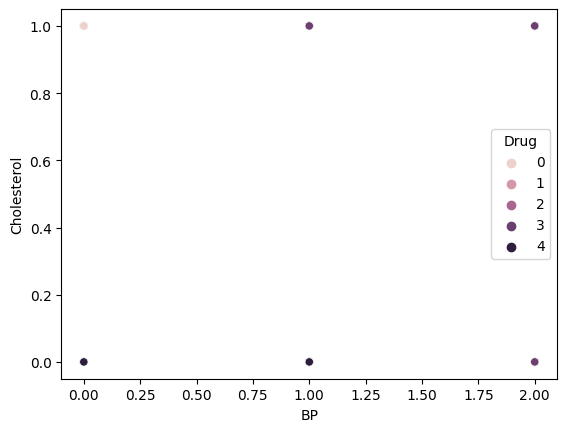

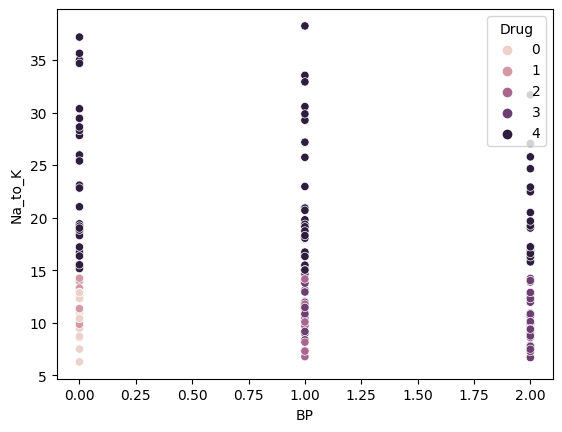

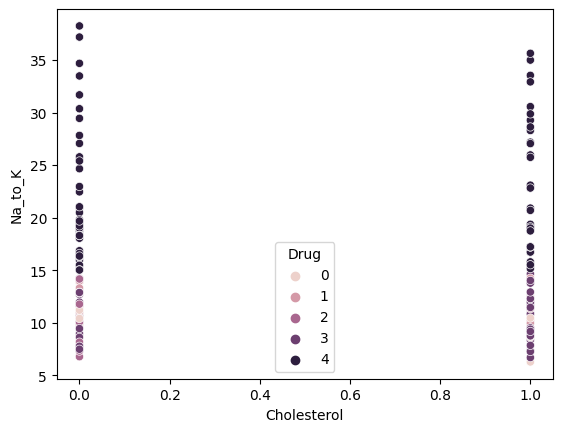

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


for i in range(len(train.columns) - 1):
  for j in range(i+1, len(train.columns) - 1 ):
    x_label = train.columns[i]
    y_label = train.columns[j]
    sns.scatterplot(x=x_label, y=y_label, data=train, hue='Drug')
    plt.show()

# Decision Tree

In [12]:
X_train = train.drop(['Drug'], axis=1)
y_train = train["Drug"]

In [13]:
X_test = test.drop(['Drug'], axis=1)
y_test = test['Drug']
y_test

189    4
168    4
21     4
39     3
108    1
174    0
33     4
100    0
69     4
132    3
85     1
8      4
19     4
191    0
53     4
38     3
139    3
185    4
45     3
83     0
162    3
0      4
196    2
58     3
171    3
179    4
74     4
86     3
34     3
166    4
114    3
28     4
35     3
107    4
78     0
32     3
31     1
43     3
160    3
29     4
Name: Drug, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [15]:
y_pred = classifier.predict(X_test)
y_pred

array([4, 4, 4, 3, 1, 0, 4, 0, 4, 3, 1, 4, 4, 0, 4, 3, 3, 4, 3, 0, 3, 4,
       2, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 0, 3, 1, 3, 3, 4])

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0